<a href="https://colab.research.google.com/github/Jorge-LGH/Learn_Python/blob/main/igraph.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# iGraph

Si bien, el repositorio en el cual se encuentra este recurso es para personas que cursan la licenciatura en Microbiología en la UAQ, y por ende ya deberían de conocer esta biblioteca; se da una breve explicación de qué consta.

iGraph es una utilizada para el análisis y modelado de redes complejas. Proporciona una amplia gama de herramientas y algoritmos para trabajar con redes, permitiendo la manipulación, visualización y análisis de grafos.

Puedes crear, modificar y analizar redes de diferentes tipos, como redes sociales, redes biológicas, redes de transporte, entre otras. La biblioteca admite la representación y manipulación de grafos dirigidos y no dirigidos, y ofrece una amplia gama de algoritmos para el estudio de la estructura y dinámica de las redes.

Si requieres más información, no dudes en visitar la [documentación oficial](https://python.igraph.org/en/stable/index.html).

In [2]:
%%capture
!pip install igraph

In [3]:
import igraph as ig
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random

# Creando un grafo

Como seguramente recuerdas, el primer paso para poder analizar una red, es hacer la red en sí misma. Para esto, iGraph cuenta con varios métodos para crear redes, ya sea redes vacías, redes famosas o las redes que cualquier persona quiera.

## A partir de matrices

Tal como es el caso en R, iGraph en Python puede generar redes a partir de matrices. Debemos de recordar que estas matrices pueden ser de adyacencia o pueden ser matrices pesadas. En los siguientes ejemplos podemos ver la elaboración de las redes y una representación gráfica simple.

IGRAPH D--- 4 10 --
+ attr: label (v)
+ edges:
0->1 0->2 1->0 1->2 1->3 2->0 2->1 2->3 3->1 3->2


<Axes: >

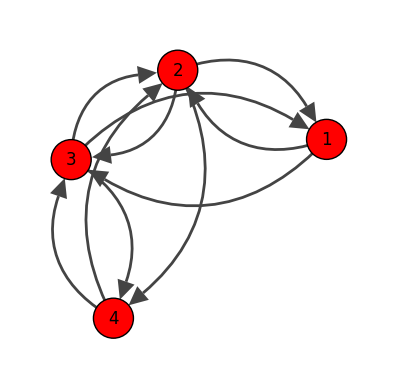

In [ ]:
# Matriz de adyacencia
adj_matrix = np.array([[0, 1, 1, 0],
                       [1, 0, 1, 1],
                       [1, 1, 0, 1],
                       [0, 1, 1, 0]])

# Genera la red a partir de un objeto tipo matriz
graph = ig.Graph.Adjacency(adj_matrix)

# Añade los labels de los nodos
graph.vs["label"] = [1,2,3,4]
layout = "kk"

print(graph)

# Graficar la red
fig, ax = plt.subplots()
ig.plot(graph, layout=layout, target=ax)

<Axes: >

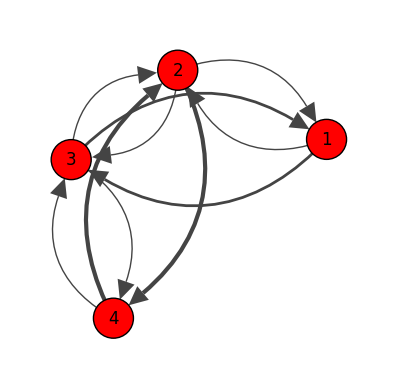

In [ ]:
# Matriz pesada
adj_matrix = np.array([[0, 1, 2, 0],
                       [1, 0, 1, 3],
                       [2, 1, 0, 1],
                       [0, 3, 1, 0]])

# crear red a partir de matriz pesada
graph = ig.Graph.Weighted_Adjacency(adj_matrix.tolist())
graph.vs["label"] = [1,2,3,4]

# parámetros visuales, en este caso solo el peso
visual_style = {}
visual_style["edge_width"] = graph.es["weight"]

# generar gráfica de la red
fig, ax = plt.subplots()
ig.plot(graph, layout="kk", target=ax, **visual_style)

## A partir de dataframes

Otra posibilidad, no tan común, es el uso de dataframes para generar nuestras redes. Esta es una acción poco habitual y es probable que no la uses en un futuro cercano; no obstante, siempre es útil tener más opciones a nuestra disposición.

<Axes: >

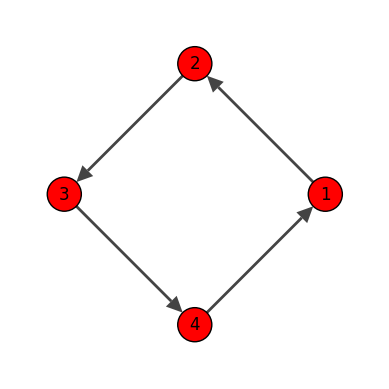

In [ ]:
# Crear dataframe con pandas, incluye de dónde y a dónde van los edges
edgelist_df = pd.DataFrame({'source': [0, 1, 2, 3],
                            'target': [1, 2, 3, 0]})

# Generar la red
graph = ig.Graph.TupleList(edgelist_df.itertuples(index=False), directed=True)
graph.vs["label"] = [1,2,3,4]

# parámetros visuales, en este caso solo el peso
visual_style = {}
visual_style["layout"] = "kk"

# generar gráfica de la red
fig, ax = plt.subplots()
ig.plot(graph, target=ax, **visual_style)

## A partir de archivos externos

Igraph nos permite cargar, leer, manipular e incluso escribir nuestras propias redes con herramientas externas tales como *networkx* y *graph-tool*. El formato para cargar estos archivos es el siguiente:

```python
graph = Graph.from_networkx(nwx)
```
```python
graph = Graph.from_graph_tool(gt)
```

## Añadir/eliminar edges y vertices

Otro aspecto de importancia al manipular redes, es la capacidad de añadir y eliminar tanto enlaces como nodos. Recuerda que esto permite modificar las interacciones entre los nodos, y por ende, la dinámica completa de la red sin importar el tipo de red o su finalidad.

#### Añadir

<Axes: >

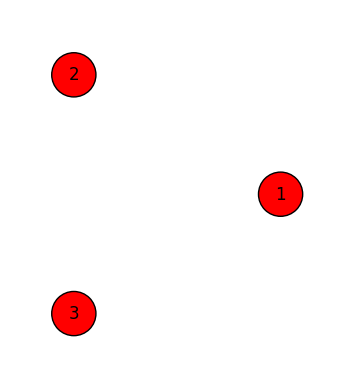

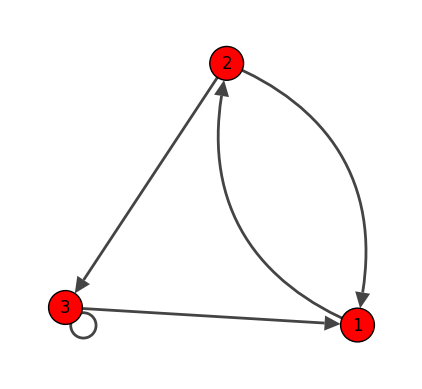

In [ ]:
# generar una red vacía
g = ig.Graph(directed = True)

# agregar la cantidad de vértices que uno quiera
g.add_vertices(3)
g.vs["label"] = [1,2,3,4]
layout = "kk"

# graficar la red
fig, ax = plt.subplots()
ig.plot(g, layout=layout, target=ax)

# añadir enlaces
g.add_edges([(0, 1), (1, 2), (2, 0), (2, 2), (1, 0)])

# graficar la red
fig, ax = plt.subplots()
ig.plot(g, layout=layout, target=ax)

#### Eliminar

RED ORIGINAL
Lista de enlaces totales en la red: [(0, 8), (1, 5), (1, 9), (1, 6), (9, 3), (0, 4), (4, 8), (8, 7), (3, 5), (3, 0), (3, 9), (0, 8), (7, 9), (0, 1), (2, 5)]
Lista de enlaces después de eliminar enlaces y nodos: [(4, 1), (1, 2), (1, 4), (3, 4), (0, 2)]


<Axes: >

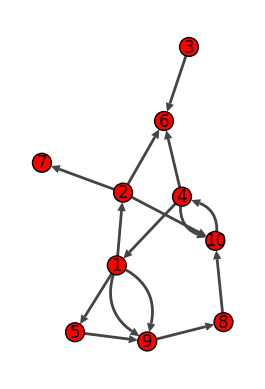

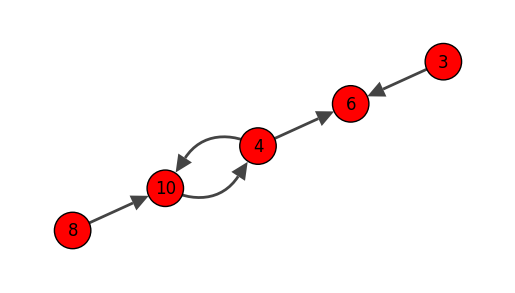

In [ ]:
#----------------------Formar la red--------------------
# generar una red vacía
g = ig.Graph(directed = True)

# agregar la cantidad de vértices que uno quiera
g.add_vertices(10)
g.vs["label"] = range(1,11)

# añadir enlaces
edges = []
for i in range(15):
  edges.append(tuple(random.sample(range(0,10),2)))

g.add_edges(edges)

# graficar la red
print("RED ORIGINAL")
visual_style = {}
visual_style["layout"] = "kk"
fig, ax = plt.subplots()
ig.plot(g,target=ax, **visual_style)

#--------------------Eliminar nodos y edges---------------
# identificar los edges que conectan nodos en específico
edge_list = g.get_edgelist()
print("Lista de enlaces totales en la red:", edge_list)
edge_id = []
for edge in edge_list:
  edge_id.append(g.get_eid(edge[0], edge[1]))

# eliminar 5 edges al azar
g.delete_edges(random.sample(edge_id,5))

# eliminar 5 nodo al azar
g.delete_vertices(random.sample(range(0,10),5))
edge_list = g.get_edgelist()
print("Lista de enlaces después de eliminar enlaces y nodos:", edge_list)

# graficar nueva red
fig, ax = plt.subplots()
ig.plot(g,target=ax, **visual_style)

## Redes random y ejemplos

iGraph también ofrece la posibilidad de generar redes al azar con algoritmos bien establecidos o, si uno prefiere, cargar algunas de las redes más famosas en esta área del conocimiento. El uso de estas redes en la mayoría de los casos es educativo, o para probar nuevos acercamientos al análisis de las mismas.

### Generadores deterministas de redes

Producen la misma gráfica siempre que ejecutas la función.

<Axes: >

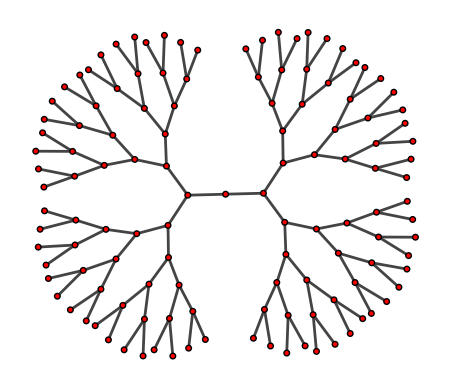

In [ ]:
g = ig.Graph.Tree(127, 2)

fig, ax = plt.subplots()
ig.plot(g, layout="kk", target=ax)

### Generadores estocásticos de redes

Produce una red diferente cada vez que se ejecuta la función.

<Axes: >

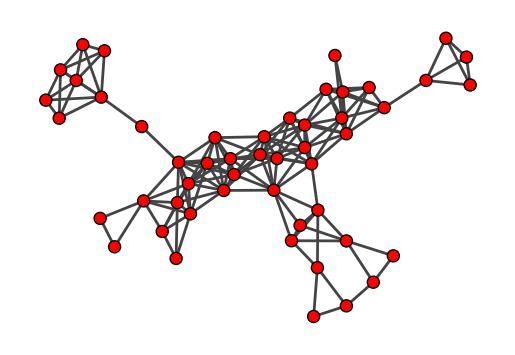

In [ ]:
g = ig.Graph.GRG(50, 0.2)

fig, ax = plt.subplots()
ig.plot(g, layout="kk", target=ax)

<Axes: >

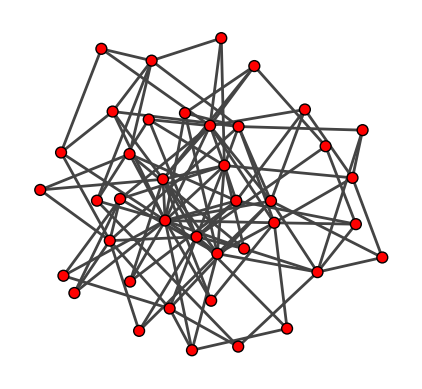

In [ ]:
g = ig.Graph.Barabasi(40, 3)

fig, ax = plt.subplots()
ig.plot(g, layout="kk", target=ax)

### Lattice

Produce una red regular con un tamaño determinado. Puede ser circular o cuadrada.

<Axes: >

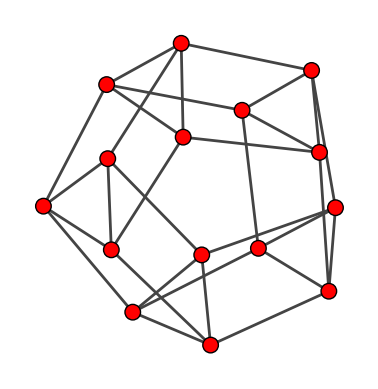

In [ ]:
g = ig.Graph.Lattice(dim=[5, 3], circular=True)

fig, ax = plt.subplots()
ig.plot(g, layout="kk", target=ax)

### Redes famosas

En este caso se presenta un ejemplo clásico, el cual es la red Zachary. La segunda red es parte de las 1253 redes disponialojadas (0-1252) en la función `Atlas()`.

<Axes: >

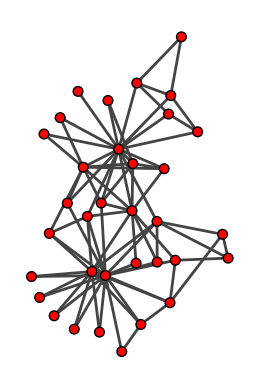

In [ ]:
g = ig.Graph.Famous('Zachary')

fig, ax = plt.subplots()
ig.plot(g, layout="kk", target=ax)

<Axes: >

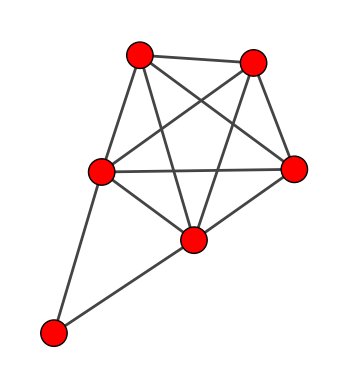

In [ ]:
g = ig.Graph.Atlas(200)

fig, ax = plt.subplots()
ig.plot(g, layout="kk", target=ax)

# Graficar una red

Ahora, como debes de saber, iGraph no es la mejor de las herramientas para generar representaciones gráficas de las redes de una manera llamativa; sin embargo, es necesario saber cómo hacerlo. Para este fin, iGraph tiene funciones que ayudan a graficar las redes, pero veremos el uso con matplotlib ya que es una herramienta más universal.

Usaremos algunos de los elementos que se explican en la [documentación oficial](https://python.igraph.org/en/stable/tutorial.html#layout-algorithms), de modo que si se desea más información en cuanto las opcines disponibles para graficar, se recomienda leer el tutorial.


<Axes: >

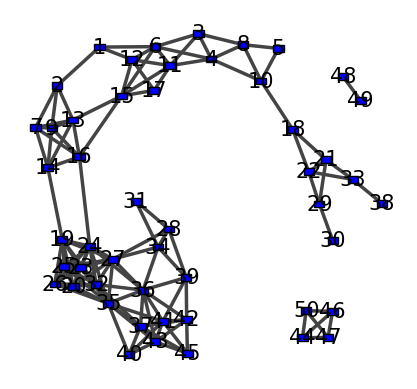

In [ ]:
# Generar la red
g = ig.Graph.GRG(50, 0.2)

# asignar nomres (números) a los nodos
g.vs["label"] = range(1,51)

# parámetros visuales
visual_style = {}
visual_style["layout"] = "fr" # estilo que los nodos son puestos en la gráfica
visual_style["vertex_color"] = "blue" # color de los nodos
visual_style["edge_width"] = 2.5 # grosor de las conexiones
visual_style["vertex_width"] = 0.3 # tamaño de los vértices
visual_style["vertex_font"] = "DINPro" # tipo de letra para los labels del nodo
visual_style["vertex_label_size"] = 15 # tamaño de la letra en label del nodo
visual_style["vertex_shape"] = "rectangle" # forma del nodo

# generar gráfica de la red
fig, ax = plt.subplots()
ig.plot(g, target=ax, **visual_style)

# Análisis de una red

Como siempre, lo más importante no es tener datos e información es saber cómo maniuplarla e interpretarla. En teoría, ya cuentas con conocimientos básicos pero fuertes acerca de la ciencia de redes, por lo que simplemente se explicará el cómo hacerlo. Si tienes dudas en lo que cada concepto representa, busca artículos o libros que te puedan ayudar.

<Axes: >

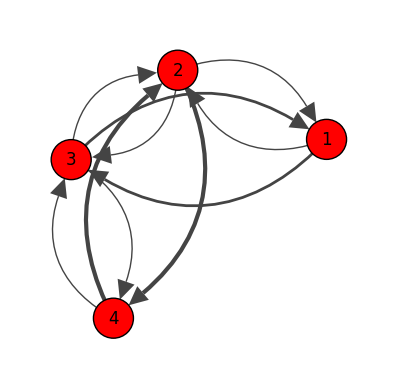

In [5]:
# matriz de adyacencia
adj_matrix = np.array([[0, 1, 2, 0],
                       [1, 0, 1, 3],
                       [2, 1, 0, 1],
                       [0, 3, 1, 0]])

# crear red a partir de matriz pesada
g = ig.Graph.Weighted_Adjacency(adj_matrix.tolist())
g.vs["label"] = [1,2,3,4]
visual_style = {}
visual_style["edge_width"] = g.es["weight"]
visual_style["layout"] = "kk"

# representación gráfica
fig, ax = plt.subplots()
ig.plot(g, target=ax, **visual_style)

## Degree

In [6]:
# degree de un nodo
deg = g.degree(0) # degree del nodo 0 en index, 1 en grafo
print("Degree del nodo 1:", deg)

# in-degree de un nodo
in_deg = g.indegree(0)
print("In-degree de nodo 1:", in_deg)

# out-degree de un nodo
out_deg = g.outdegree(0)
print("Out-degree de nodo 1:", out_deg)

# degree máximo dentro de la red
max_deg = ig.Graph.maxdegree(g)
print("Degree máximo de la red:", max_deg)

Degree del nodo 1: 4
In-degree de nodo 1: 2
Out-degree de nodo 1: 2
Degree máximo de la red: 6


## Paths

In [24]:
# distancias mínimas entre nodos
dists = ig.Graph.distances(g)
print("Distancias entre nodos:",dists)

# Camino más corto de un nodo a otro
sht_path = g.get_shortest_paths(0, to=1, output="vpath")
print("Camino más corto entre nodos:",sht_path)

# Camino más corto con pesos
results = g.get_shortest_paths(0, to=1, weights=g.es["weight"], output="epath")

if len(results[0]) > 0:
    # Add up the weights across all edges on the shortest path
    distance = 0
    for e in results[0]:
        distance += g.es[e]["weight"]
    print("Shortest weighted distance is: ", distance)
else:
    print("End node could not be reached!")

Distancias entre nodos: [[0, 1, 1, 2], [1, 0, 1, 1], [1, 1, 0, 1], [2, 1, 1, 0]]
Camino más corto entre nodos: [[0, 1]]
Shortest weighted distance is:  1.0


## Propiedades de nodos

In [23]:
# betweenness
bet = ig.Graph.betweenness(g, weights=g.es["weight"])
print("Betweenness de los nodos:",bet)

# closeness
cls = ig.Graph.closeness(g, weights=g.es["weight"])
print("Closeness de los nodos:",cls)

# eccentricity
ecc = ig.Graph.eccentricity(g)
print("Eccentricity de los nodos:",ecc)

Betweenness de los nodos: [0.0, 2.0, 4.0, 0.0]
Closeness de los nodos: [0.5, 0.75, 0.75, 0.5]
Eccentricity de los nodos: [2.0, 1.0, 1.0, 2.0]


## Propiedades de enlaces

In [25]:
# Checar si un set, o entre todos los enlaces, existen loops
loops = ig.Graph.is_loop(g)
print("Enlaces que son loops:",loops)

# Checa si hay un enlace en sentido contrario
mutual = ig.Graph.is_mutual(g)
print("Enlaces con una contraparte:",mutual)

# edge betweenness
ed_bet = ig.Graph.edge_betweenness(g)
print("Edge betweenness de enlaces:",ed_bet)

Enlaces que son loops: [False, False, False, False, False, False, False, False, False, False]
Enlaces con una contraparte: [True, True, True, True, True, True, True, True, True, True]
Edge betweenness de enlaces: [1.5, 1.5, 1.5, 1.0, 1.5, 1.5, 1.0, 1.5, 1.5, 1.5]


## Propiedades globales

In [30]:
# diámetro de la red
diam = ig.Graph.diameter(g)
print("Diámetro de la red:",diam)

# radio de la red
rad = ig.Graph.radius(g)
print("Radio de lared",rad)

# Promedio de paths
ave_path = ig.Graph.average_path_length(g)
print("Promedio de paths:",ave_path)

# Degree distribution
deg_dist = ig.Graph.degree_distribution(g)
print("Degree distribution:",deg_dist)


Diámetro de la red: 2
Radio de lared 1
Promedio de paths: 1.1666666666666667
Degree distribution: N = 4, mean +- sd: 5.0000 +- 1.1547
[4, 5): ** (2)
[5, 6):  (0)
[6, 7): ** (2)


## Clustering

<Axes: >

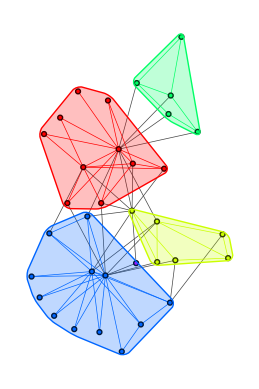

In [48]:
g = ig.Graph.Famous('Zachary')
communities = g.community_edge_betweenness()
communities = communities.as_clustering()
num_communities = len(communities)

palette1 = ig.RainbowPalette(n=num_communities)
for i, community in enumerate(communities):
    g.vs[community]["color"] = i
    community_edges = g.es.select(_within=community)
    community_edges["color"] = i
fig1, ax1 = plt.subplots()

ig.plot(
    communities,
    target=ax1,
    mark_groups=True,
    palette=palette1,
    vertex_size=0.1,
    edge_width=0.5,
)

<Axes: >

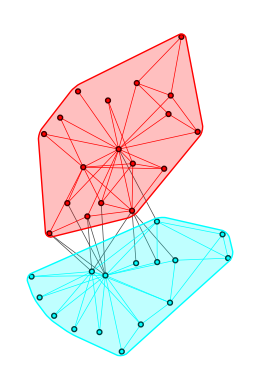

In [49]:
g = ig.Graph.Famous('Zachary')
communities = g.community_label_propagation()
num_communities = len(communities)

palette1 = ig.RainbowPalette(n=num_communities)
for i, community in enumerate(communities):
    g.vs[community]["color"] = i
    community_edges = g.es.select(_within=community)
    community_edges["color"] = i
fig1, ax1 = plt.subplots()

ig.plot(
    communities,
    target=ax1,
    mark_groups=True,
    palette=palette1,
    vertex_size=0.1,
    edge_width=0.5,
)

<Axes: >

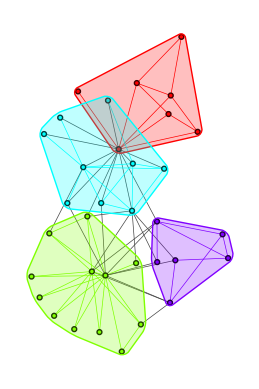

In [50]:
g = ig.Graph.Famous('Zachary')
communities = g.community_leading_eigenvector()
num_communities = len(communities)

palette1 = ig.RainbowPalette(n=num_communities)
for i, community in enumerate(communities):
    g.vs[community]["color"] = i
    community_edges = g.es.select(_within=community)
    community_edges["color"] = i
fig1, ax1 = plt.subplots()

ig.plot(
    communities,
    target=ax1,
    mark_groups=True,
    palette=palette1,
    vertex_size=0.1,
    edge_width=0.5,
)